## GTZAN Audio classification using Spectograms

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

Num GPUs Available:  1


In [2]:
data_dir = '/tf/work/Datasets/GTZAN/images_original'\

img_height, img_width = 256, 256
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)



Found 999 files belonging to 10 classes.
Using 800 files for training.
Found 999 files belonging to 10 classes.
Using 199 files for validation.


In [3]:
class_names = train_ds.class_names
print(class_names)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


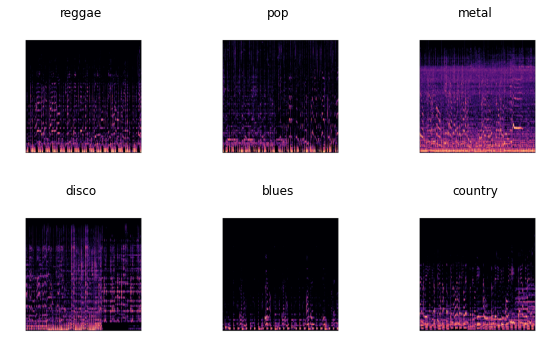

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))

for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
import tensorflow.keras.layers as layers

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip(
        "horizontal", 
         input_shape=(
            img_height, 
            img_width,
            3
         )
    ),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


In [11]:
num_classes = 10

model = keras.Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])


In [12]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 16)      4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 64, 16)       

In [17]:
epochs=100

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/100
25/25 [==============================] - 2s 81ms/step - loss: 0.6220 - accuracy: 0.7775 - val_loss: 1.8605 - val_accuracy: 0.4824
Epoch 2/100
25/25 [==============================] - 2s 80ms/step - loss: 0.6728 - accuracy: 0.7613 - val_loss: 1.6911 - val_accuracy: 0.4824
Epoch 3/100
25/25 [==============================] - 2s 80ms/step - loss: 0.6479 - accuracy: 0.7800 - val_loss: 2.0254 - val_accuracy: 0.4623
Epoch 4/100
25/25 [==============================] - 2s 80ms/step - loss: 0.6266 - accuracy: 0.7825 - val_loss: 2.3318 - val_accuracy: 0.4422
Epoch 5/100
25/25 [==============================] - 2s 80ms/step - loss: 0.6344 - accuracy: 0.7713 - val_loss: 1.9541 - val_accuracy: 0.4573
Epoch 6/100
25/25 [==============================] - 2s 81ms/step - loss: 0.6007 - accuracy: 0.7875 - val_loss: 1.8405 - val_accuracy: 0.5176
Epoch 7/100
25/25 [==============================] - 2s 81ms/step - loss: 0.5966 - accuracy: 0.8037 - val_loss: 1.8059 - val_accuracy: 0.5327
Epoch 

25/25 [==============================] - 2s 85ms/step - loss: 0.3031 - accuracy: 0.8975 - val_loss: 2.1418 - val_accuracy: 0.5477
Epoch 59/100
25/25 [==============================] - 2s 87ms/step - loss: 0.2807 - accuracy: 0.9062 - val_loss: 2.1853 - val_accuracy: 0.5327
Epoch 60/100
25/25 [==============================] - 2s 86ms/step - loss: 0.2708 - accuracy: 0.9100 - val_loss: 2.8659 - val_accuracy: 0.5176
Epoch 61/100
25/25 [==============================] - 2s 89ms/step - loss: 0.2746 - accuracy: 0.9025 - val_loss: 2.3625 - val_accuracy: 0.5427
Epoch 62/100
25/25 [==============================] - 2s 87ms/step - loss: 0.2766 - accuracy: 0.9025 - val_loss: 2.5121 - val_accuracy: 0.5025
Epoch 63/100
25/25 [==============================] - 2s 86ms/step - loss: 0.2558 - accuracy: 0.9062 - val_loss: 2.9609 - val_accuracy: 0.4824
Epoch 64/100
25/25 [==============================] - 2s 85ms/step - loss: 0.2749 - accuracy: 0.9013 - val_loss: 2.6597 - val_accuracy: 0.5126
Epoch 65/100

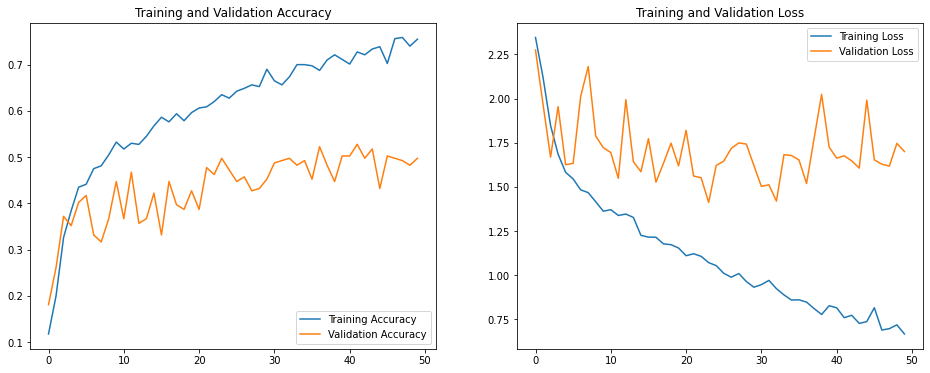

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()